In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [2]:
# Load data
data = pd.read_csv('/content/Titanic-Dataset.csv')


In [3]:
#1. Eksporasi Awal
total_penumpang = len(data)
total_penumpang

891

a. Dari data tersebut di ketahui bahwa terdapat 891 penumpang di dalam kapal yang di ketahui

<ipython-input-4-6ed3d8d2c725>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='Set2')


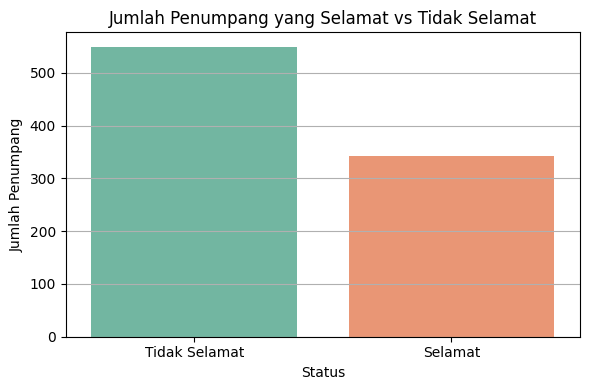

,Jumlah Penumpang
Survived,
Tidak Selamat,549
Selamat,342


In [4]:
# Menghitung jumlah penumpang yang selamat dan tidak selamat
survival_counts = data['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})
survival_table = survival_counts.to_frame(name='Jumlah Penumpang')
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='Set2')
plt.title('Jumlah Penumpang yang Selamat vs Tidak Selamat')
plt.ylabel('Jumlah Penumpang')
plt.xlabel('Status')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

survival_table


b. Dari data tersebut terdapat penumpang yang selamat  sebanyak 342 dan penumpang yang tidak selamat sebanyak 549

In [5]:
# Rata-rata umur penumpang
rata_rata_umur = data['Age'].mean()

# Penumpang termuda
penumpang_termuda = data[data['Age'] == data['Age'].min()][['Name', 'Age']]

# Penumpang tertua
penumpang_tertua = data[data['Age'] == data['Age'].max()][['Name', 'Age']]

rata_rata_umur, penumpang_termuda, penumpang_tertua


(np.float64(29.69911764705882),
                                 Name   Age
 803  Thomas, Master. Assad Alexander  0.42,
                                      Name   Age
 630  Barkworth, Mr. Algernon Henry Wilson  80.0)

c. Dari data tersebut dapat di ketahui bahwa rata-rata umur penumpang dalam kapal titanic adalah 29-30 tahun dan Dan penumpang termuda adalah Thomas, Masster.Assad Alexander yang berumur sekitar 5 bulan (0,42) dan penumpang tertua adalah Barkworth, Mr. Algernon Henry Wilson yang memiliki usia 80 tahun

<ipython-input-6-9d65a3a3af38>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='Set2')


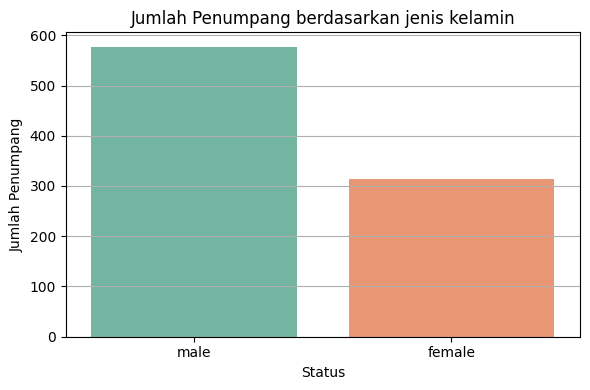

,Jumlah penumpang
Sex,
male,577
female,314


In [6]:
# Hitung jumlah penumpang yang selamat dan tidak selamat
survival_counts = data['Sex'].value_counts().rename(index={0: 'male', 1: 'female'})

# Tabel
survival_table = survival_counts.to_frame(name='Jumlah penumpang')

# Visualisasi
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='Set2')
plt.title('Jumlah Penumpang berdasarkan jenis kelamin')
plt.ylabel('Jumlah Penumpang')
plt.xlabel('Status')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

survival_table


d. Jumlah penumpang berdasarkan jenis kelamin yaitu sebanyak 577 laki-laki dan 314 perempuan dari sini kita bisa melihat bahwa yang paling banyak penumpang di dalam kapal titanic ini adalah laki-laki

In [7]:
# Menghitung jumlah penumpang berdasarkan kelas
jumlah_per_kelas = data['Pclass'].value_counts().sort_index()

# Menghitung persentase penumpang yang berada di kelas 1
persentase_kelas_1 = (jumlah_per_kelas[1] / len(data)) * 100

# Menampilkan hasil
print("Jumlah penumpang berdasarkan kelas:")
print(jumlah_per_kelas)
print(f"\nPersentase penumpang yang berada di kelas 1: {persentase_kelas_1:.2f}%")


Jumlah penumpang berdasarkan kelas:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Persentase penumpang yang berada di kelas 1: 24.24%


e. Jumlah penumpang di dalam pclass yaitu ada 3 yang mana kelas satu ada sebanyak 216 penumpang kelas 2 terdapat 184 penumpang dan kelas 3 terdapat 491 orang. dan terdapat 24,24 % yang ada di kelas 1

In [8]:
# 2. Prepocessing Data
# Missing value
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


2 a. Dari  data tersebut dapat saya temukan missing value di  kolom Age sebanyak 177 baris dan cabin sebanyak 687 baris serta kolom embarked sebanyak 2 baris

In [9]:
#Mengisi missing Value
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
print("Jumlah missing value setelah ditangani:")
print(data[['Age', 'Cabin', 'Embarked']].isnull().sum())


Jumlah missing value setelah ditangani:
Age         0
Cabin       0
Embarked    0
dtype: int64


<ipython-input-9-a374e758c1e3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-9-a374e758c1e3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

b.  karena terdapat missing value saya menangani dengan untuk kolom umur saya isi dengan median, untuk kolom kabin missing value saya isi dengan Unknown dan untuk kolom embarked saya isi dengan modus

In [10]:
import numpy as np
kolom_numerik = ['Age', 'Fare']
for kolom in kolom_numerik:
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[kolom] < lower_bound) | (data[kolom] > upper_bound)]

    print(f"\nKolom: {kolom}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Rentang normal: [{lower_bound:.2f}, {upper_bound:.2f}]")



Kolom: Age
Jumlah outlier: 66
Rentang normal: [2.50, 54.50]

Kolom: Fare
Jumlah outlier: 116
Rentang normal: [-26.72, 65.63]


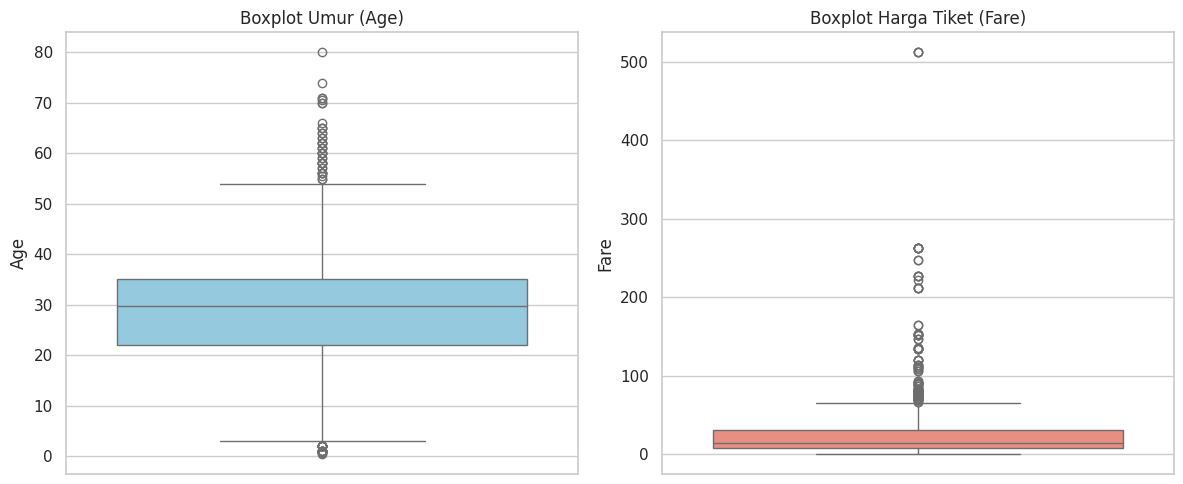

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['Age'], color='skyblue')
plt.title('Boxplot Umur (Age)')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Fare'], color='salmon')
plt.title('Boxplot Harga Tiket (Fare)')

plt.tight_layout()
plt.show()


c. terdapat outlier pada data tersebut untuk kolom age terdapat outlier pada
di sisi bawah dengan usia sekitar 0-5 tahun dan di sisi atas sekitar usia 60 - 80 tahun
Untuk kolom fare, ditemukan terdapat banyak outlier dengan harga tiket yang cukup tinggi yaitu melebihi dari 100 ini menunjukkan distribusi  yang tidak seimbang banyak nilai kecil, sedikit nilai sangat besar.
Outlier adalah  sebuah titik data yang nilainya jauh berbeda dari nilai-nilai data lainnya dalam suatu kumpulan data.
d. Menurut saya untuk data Age tidak perlu di atasi penanganan outlier karena menurut saya akan membantu melatih model. untuk data fare mungkin saya akan mencoba untuk menangani nya karena di khawatirkan nilai yang sangat tinggi dapan mempengaruhi model

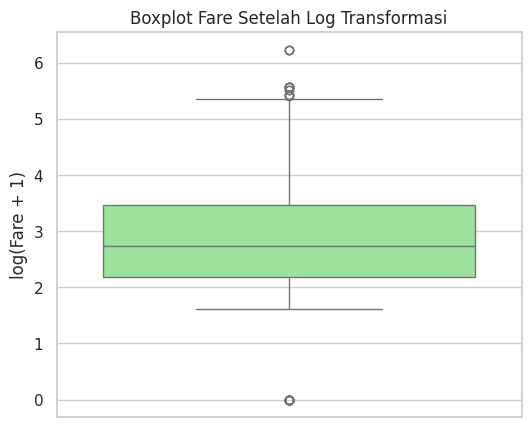

In [12]:
# 2d. Melakukan penanganan Outlier dengan Tansformasi
import numpy as np
data['Fare_log'] = np.log1p(data['Fare'])
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(y=data['Fare_log'], color='lightgreen')
plt.title('Boxplot Fare Setelah Log Transformasi')
plt.ylabel('log(Fare + 1)')
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
X = data.drop('Survived', axis=1)
y = data['Survived']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Modelling
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Survived'])
y = data['Survived']

# Bagi data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan info hasil pembagian
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing :", X_test.shape[0])


Jumlah data training: 712
Jumlah data testing : 179


3 a. Disini saya membagi data menjadi dua yaitu data training, dan data testing Alasan mengapa perlu membagi data tersebut yaitu data training digunakan untuk latihan dan data testing di gunakan untuk di uji data ini di bagi agar model belajar pola bukan menghafal, jadi hasil evaluasinya kita bisa tahu seberapa baik model akan bekerja untuk data baru.
 b. Untuk proporsi pembagian nya saya memilih 80% data training dan 20% data testing karena dengan proporsi 80% untuk data training memberi cukup variasi data agar model bisa belajar pola-pola penting. dan 20% untuk data testing biasanya sudah representatif untuk melihat performa model.  

In [15]:
#Evaluasi Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


In [16]:
# --- Logistic Regression ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# --- Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- K-Nearest Neighbors (KNN) ---
knn_model = KNeighborsClassifier(n_neighbors=5)  # default 5 tetangga
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


c. disini saya mencoba modelling dengan menggunakan 3 macam jenis yaitu Logistic Regression, Random Forest, dan K-Nearest Neighbors
- Logistic Regression adalah model klasifikasi yang digunakan untuk memprediksi probabilitas dari dua kelas (binary classification), cara kerjanya Menggunakan fungsi logistik (sigmoid) untuk mengubah hasil prediksi menjadi nilai probabilitas antara 0 dan 1.
Jika probabilitas > 0.5 → diprediksi kelas 1 (selamat), jika tidak → kelas 0 (tidak selamat).
- Random Forest adalah model klasifikasi berbasis ensemble learning yang membangun banyak pohon keputusan (decision tree) dan menggabungkan hasilnya. untuk cara kerjanya Membuat banyak decision tree dari subset data yang berbeda (dengan teknik bootstrap sampling).
Masing-masing pohon membuat prediksi, lalu hasilnya digabungkan (majority voting) untuk menghasilkan keputusan akhir.
- KNN adalah model klasifikasi yang tidak membangun model matematis, tetapi membandingkan langsung dengan data latih saat memprediksi. untuk cara kerjanya Ketika memprediksi data baru, KNN mencari k tetangga terdekat (misalnya 5 tetangga terdekat).

Kelas dari data baru ditentukan berdasarkan mayoritas kelas dari tetangga tersebut.

In [17]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n===== Evaluasi {name} =====")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluasi semua model
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn)



===== Evaluasi Logistic Regression =====
Akurasi: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


===== Evaluasi Random Forest =====
Akurasi: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


===== Evaluasi K-Nearest Neighbors =====
Akurasi: 0.7877094972067039
Classification Report:
               precision    recall  f1-score   support

           0   

d. untuk nilai evaluasi terdapat pada hasil di atas sesuai dengan judulnya dengan arti metrik dari masing masing model nya yaitu untuk accuracy adalah presentase prediksi yang benar dari keseluruhan prediksi misal pada hasil evaluasi Logistic  Regression tertulis 0,80 maka artinya 81% dari data uji berhasil di klasifikasi dengan benar begitu seterusnya
kemudian untuk Precision adalah dari seluruh prediksi "Selamat", berapa % yang benar-benar selamat Misal pada logistic regression tertulis precision nya 0,77 maka di artikan dari 100 penumpang yang di prediksi selamat, 77 di antaranya memangbenar-benar selamat begitu seterusnya
kemudian untuk recall adalah semua penumpang yang benar-benar selamat, berapa persen yang berhasil diprediksi sebagai selamat misal pada hasil evaluasi  logistic regression tertulis 0,70 maka  dari 100 penumpang yang benar-benar selamat, hanya 70 yang berhasil diprediksi sebagai selamat.
untuk f1score adalah  Rata-rata harmonis antara precision dan recall dengan penjelasan semakin mendekati 1 , maka semakin bagus performa model kelas tersebut
d. dari ketiga hasil tersebut random forest adalah yang baling baik. karena
1. Ensemble Learning=Random Forest terdiri dari banyak decision tree. Masing-masing pohon dilatih pada subset acak data dan fitur, lalu hasilnya dipilih berdasarkan voting.
Ini membuat model lebih stabil dan kurang rentan terhadap overfitting dibanding single decision tree.
2. Robust terhadap noise dan outlier
Karena menggunakan agregasi banyak model, Random Forest tidak mudah terpengaruh oleh data yang tidak normal atau outlier — yang memang ada di dataset Titanic seperti pada Fare.
3. Dapat menangani fitur kategorikal dan numerik
Random Forest bisa bekerja dengan baik tanpa perlu banyak praproses terhadap fitur yang bersifat kategorikal, apalagi setelah di encoding sebelumnya.
4. Menangkap hubungan non-linear
Model seperti Logistic Regression hanya bisa memodelkan hubungan linear. Sementara Random Forest bisa menangkap hubungan yang kompleks dan tidak linear, yang sangat mungkin ada pada data Titanic (misalnya kombinasi umur dan kelas tiket).

In [ ]:
import numpy as np

# Prediksi menggunakan model terbaik (misal Random Forest)
y_pred = rf_model.predict(X_test)

# a. Jumlah yang diprediksi selamat (kelas 1)
predicted_selamat = (y_pred == 1)
jumlah_prediksi_selamat = np.sum(predicted_selamat)

# b. Jumlah yang benar-benar selamat dari prediksi tersebut
benar_selamat = np.sum((y_pred == 1) & (y_test == 1))

print("Jumlah penumpang yang diprediksi selamat:", jumlah_prediksi_selamat)
print("Jumlah yang benar-benar selamat:", benar_selamat)


Jumlah penumpang yang diprediksi selamat: 65
Jumlah yang benar-benar selamat: 50


4  b. penumpang yang di prediksi selamat ada 65 orang dan di prediksi benar benar selamat ada 50 orang.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

precision_selamat = report['1']['precision']
recall_selamat = report['1']['recall']

print(f"Precision (selamat): {precision_selamat:.2f}")
print(f"Recall (selamat): {recall_selamat:.2f}")


Precision (selamat): 0.77
Recall (selamat): 0.72


4 a. untuk nilai precission dari hasil evaluasi Random forest adalah o,77 yang artinya seluruh penumpang yang di prediksi selamat oleh model 77% diantaranya benar benar selamatdan 23% di antaranya bisa dibilang selamat (false Positive) untuk recall nya 0,72 artinya seluruh penumpang yang benar-benar selamat model berhasil mengidentifikasi 72% di antaranya benar. dan 28% penumpang selamat yang tidak terdeteksi oleh model(false negatives)